### Importação dos dados



In [67]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [68]:
media_preco_loja = loja['Preço'].mean()
media_preco_loja2 = loja2['Preço'].mean()
media_preco_loja3 = loja3['Preço'].mean()
media_preco_loja4 = loja4['Preço'].mean()

print(f"Média de preço da loja 1: {media_preco_loja}")
print(f"Média de preço da loja 2: {media_preco_loja2}")
print(f"Média de preço da loja 3: {media_preco_loja3}")
print(f"Média de preço da loja 4: {media_preco_loja4}")

Média de preço da loja 1: 650.4913607460788
Média de preço da loja 2: 630.9703518440017
Média de preço da loja 3: 620.6125604069521
Média de preço da loja 4: 587.1491009329941


In [69]:
def faturamento(lista):
    faturamento = 0
    for linha in lista:
        try:
            faturamento += float(linha[2])
        except (ValueError, IndexError):
            continue
    return faturamento

dados =  loja.values.tolist()
dados2 = loja2.values.tolist()
dados3 = loja3.values.tolist()
dados4 = loja4.values.tolist()

faturamentos = {
    "Loja 1": faturamento(dados),
    "Loja 2": faturamento(dados2),
    "Loja 3": faturamento(dados3),
    "Loja 4": faturamento(dados4),
}

loja_menor = min(faturamentos, key=faturamentos.get)
loja_maior = max(faturamentos , key=faturamentos.get)


print(f"\033[1;31mA loja que menos vendeu foi {loja_menor} com R$ {faturamentos[loja_menor]:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"\033[1;32mA loja que mais vendeu foi {loja_maior} com R$ {faturamentos[loja_maior]:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


A loja que menos vendeu foi Loja 4 com R$ 1.384.497,58
A loja que mais vendeu foi Loja 1 com R$ 1.534.509,12


# 2. Vendas por Categoria


In [70]:
def vendas_por_categoria(lista):
    try:
        categorias = {}
        for linha in lista:
            try:
                categoria = linha[1]
                valor = float(linha[2])
                if categoria in categorias:
                    categorias[categoria] += valor
                else:
                    categorias[categoria] = valor
            except (IndexError, ValueError):
                continue
        return categorias
    except Exception as e:
        print(f"Erro ao processar a lista: {e}")
        return {}

categorias_por_loja = {
  "Loja 1": vendas_por_categoria(dados),
  "Loja 2": vendas_por_categoria(dados2),
  "Loja 3": vendas_por_categoria(dados3),
  "Loja 4": vendas_por_categoria(dados4),
}
valor_categorias_loja = {
  "Loja 1": vendas_por_categoria(dados),
  "Loja 2": vendas_por_categoria(dados2),
  "Loja 3": vendas_por_categoria(dados3),
  "Loja 4": vendas_por_categoria(dados4),

}


categorias_gerais = set()
for loja in categorias_por_loja:
    categorias_gerais.update(categorias_por_loja[loja])


categorias_gerais = sorted(list(categorias_gerais))


for categoria in categorias_gerais:
    total_categoria = 0
    for loja in valor_categorias_loja:
        if categoria in valor_categorias_loja[loja]:
            total_categoria += valor_categorias_loja[loja][categoria]
    print(f"{categoria}:R$ {total_categoria:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


brinquedos:R$ 98.140,86
eletrodomesticos:R$ 1.766.337,03
eletronicos:R$ 2.214.099,72
esporte e lazer:R$ 190.635,39
instrumentos musicais:R$ 465.029,67
livros:R$ 50.260,74
moveis:R$ 1.010.214,00
utilidades domesticas:R$ 76.773,38


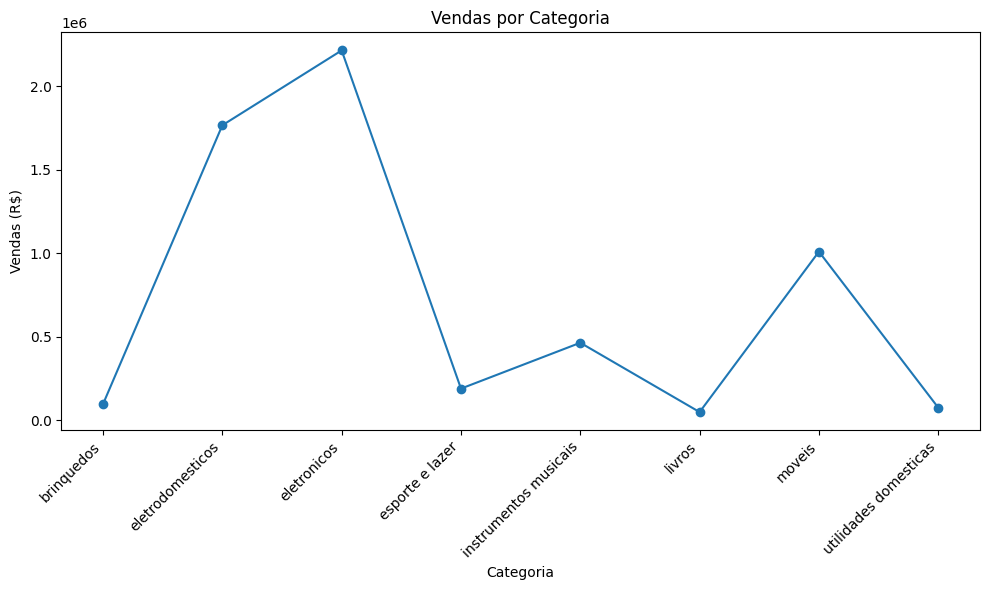

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

categories = categorias_gerais
sales_data = []
for categoria in categorias_gerais:
    total_categoria = 0
    for loja in valor_categorias_loja:
        if categoria in valor_categorias_loja[loja]:
            total_categoria += valor_categorias_loja[loja][categoria]
    sales_data.append(total_categoria)


plt.figure(figsize=(10, 6))
plt.plot(categories, sales_data, marker='o', linestyle='-')

plt.xlabel("Categoria")
plt.ylabel("Vendas (R$)")
plt.title("Vendas por Categoria")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [72]:
def avaliacao (lista) :
  nota = 0

  for linha in lista:
    try:
      nota += int(linha[7])
    except (ValueError, IndexError):
        continue

  nota_total = nota / len(lista)
  return nota_total

media_por_loja = {
  "Loja 1": avaliacao(dados),
  "Loja 2": avaliacao(dados2),
  "Loja 3": avaliacao(dados3),
  "Loja 4": avaliacao(dados4),

}
loja_menorAV = min(media_por_loja, key=media_por_loja.get)
loja_maiorAV = max(media_por_loja, key=media_por_loja.get)

print(f"\033[31mA loja que tem a menor media é a  {loja_menorAV} com  {media_por_loja[loja_menorAV]:,.2f}")
print(f"\033[32mA loja que tem a melhor media é a {loja_maiorAV} com  {media_por_loja[loja_maiorAV]:,.2f}")

A loja que tem a menor media é a  Loja 1 com  3.98
A loja que tem a melhor media é a Loja 3 com  4.05


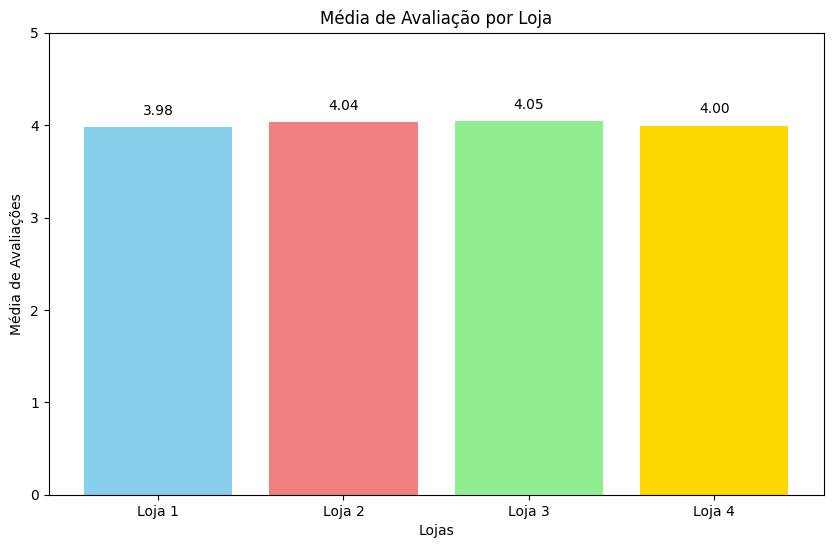

In [73]:
import matplotlib.pyplot as plt

media_por_loja = {
  "Loja 1": avaliacao(dados),
  "Loja 2": avaliacao(dados2),
  "Loja 3": avaliacao(dados3),
  "Loja 4": avaliacao(dados4),
}

lojas = list(media_por_loja.keys())
avaliacoes = list(media_por_loja.values())

plt.figure(figsize=(10, 6))
plt.bar(lojas, avaliacoes, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliações")
plt.title("Média de Avaliação por Loja")
plt.ylim(0, 5)

for i, v in enumerate(avaliacoes):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')


plt.show()


# 4. Produtos Mais e Menos Vendidos

In [74]:
def produtos_vendidos(lista):
    try:
        categorias = {}
        for linha in lista:
            try:
                categoria = linha[0]
                valor = float(linha[2])
                if categoria in categorias:
                    categorias[categoria] += valor
                else:
                    categorias[categoria] = valor
            except (IndexError, ValueError):
                continue
        return categorias
    except Exception as e:
        print(f"Erro ao processar a lista: {e}")
        return {}

produtos_nome = {
  "Loja 1": produtos_vendidos(dados),
  "Loja 2": produtos_vendidos(dados2),
  "Loja 3": produtos_vendidos(dados3),
  "Loja 4": produtos_vendidos(dados4),
}

produtos_gerais = {}


for loja, produtos in produtos_nome.items():
    for produto, valor in produtos.items():
        if produto in produtos_gerais:
            produtos_gerais[produto] += valor
        else:
            produtos_gerais[produto] = valor

produtos_ordenados = sorted(produtos_gerais.items(), key=lambda x: x[1], reverse=True)

for produto, total in produtos_ordenados:
    print(f"\n{produto}: R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

prod_low = min(produtos_gerais, key=produtos_gerais.get)
prod_max = max(produtos_gerais, key=produtos_gerais.get)



print(f"\033[1;33;42m\nProduto Mais vendido : {prod_max} Valor: R$ {produtos_gerais[prod_max]:,.3f}".replace(",", "X").replace(".", ",").replace("X", "."))
print(f"\033[0;33;41m\nProduto Menos vendido : {prod_low} Valor: R$ {produtos_gerais[prod_low]:,.3f} ".replace(",", "X").replace(".", ",").replace("X", "."))



TV Led UHD 4K: R$ 576.652,70

Celular Plus .42: R$ 534.735,14

Geladeira: R$ 513.249,34

Smart TV: R$ 386.963,12

Lavadora de roupas: R$ 323.292,37

Lava louças: R$ 320.715,58

Tablet AB.Y: R$ 292.016,76

Secadora de roupas: R$ 280.317,31

Celular AB.Y: R$ 210.547,77

Bateria: R$ 197.074,45

Cama king: R$ 181.040,36

Fogão: R$ 174.495,19

Guitarra: R$ 172.539,87

Sofá retrátil: R$ 164.371,85

Micro-ondas: R$ 154.267,24

Cama box: R$ 138.797,42

Bicicleta: R$ 128.648,29

Guarda roupas: R$ 128.328,09

Cadeira de escritório: R$ 92.132,31

Violão: R$ 78.530,63

Cômoda: R$ 77.892,33

Impressora: R$ 74.969,03

Kit banquetas: R$ 71.045,78

Mesa de jantar: R$ 62.420,90

Poltrona: R$ 54.395,35

Assistente virtual: R$ 45.956,59

Jogo de tabuleiro: R$ 43.269,22

Jogo de panelas: R$ 40.675,34

Smartwatch: R$ 39.905,90

Mesa de centro: R$ 39.789,61

Headset: R$ 30.330,90

Fone de ouvido: R$ 22.021,81

Mochila: R$ 21.421,54

Carrinho controle remoto: R$ 19.690,62

Panela de pressão: R$ 17.238,91

P

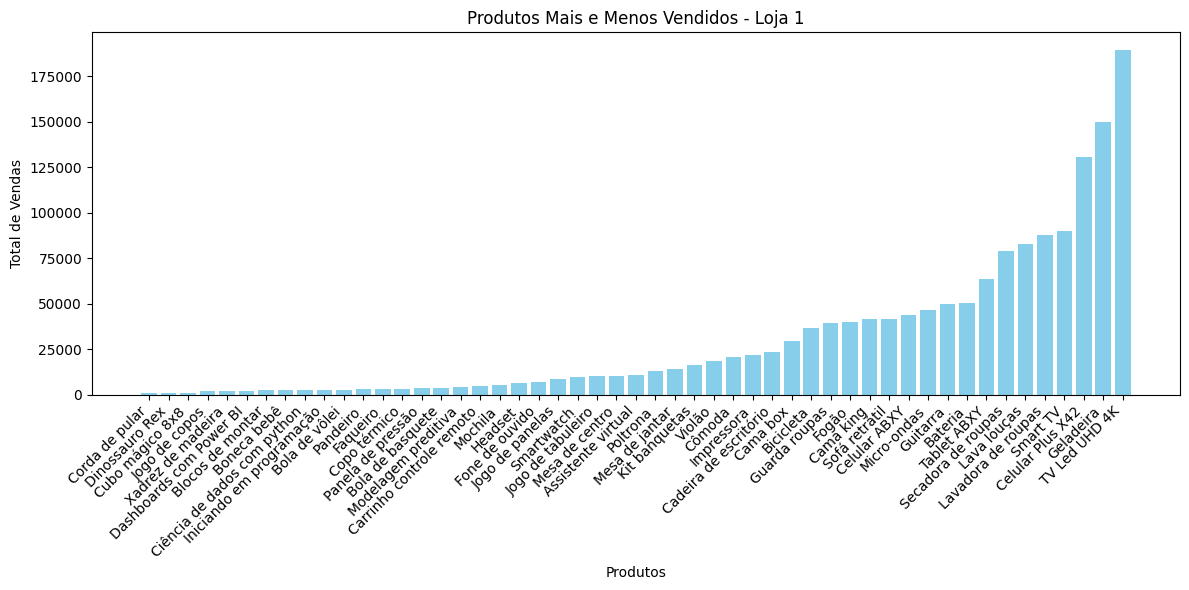

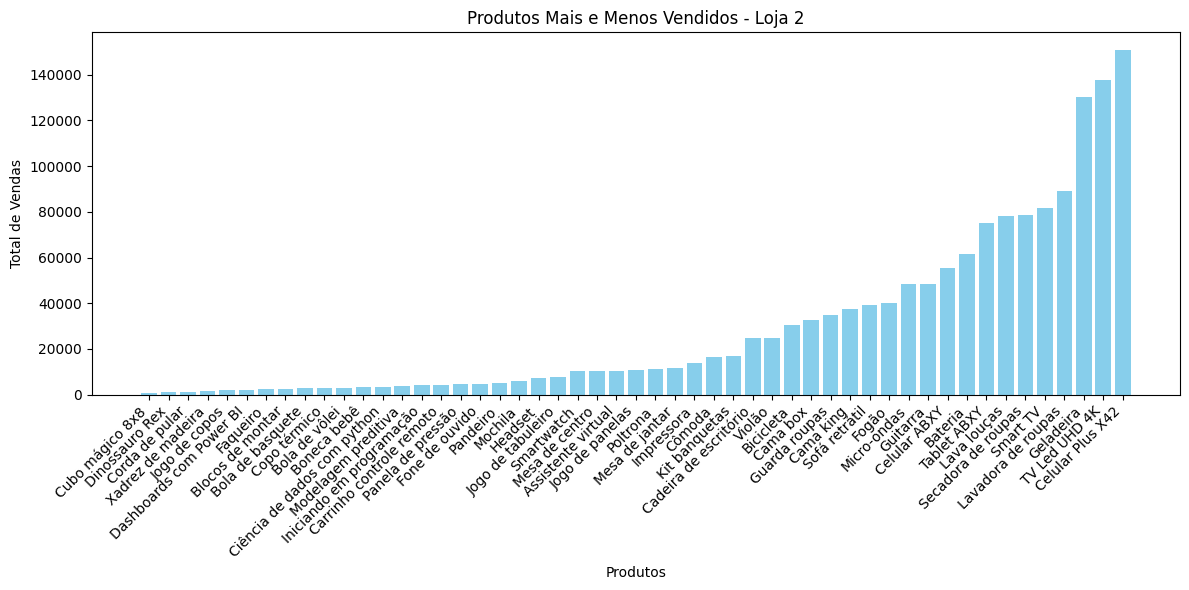

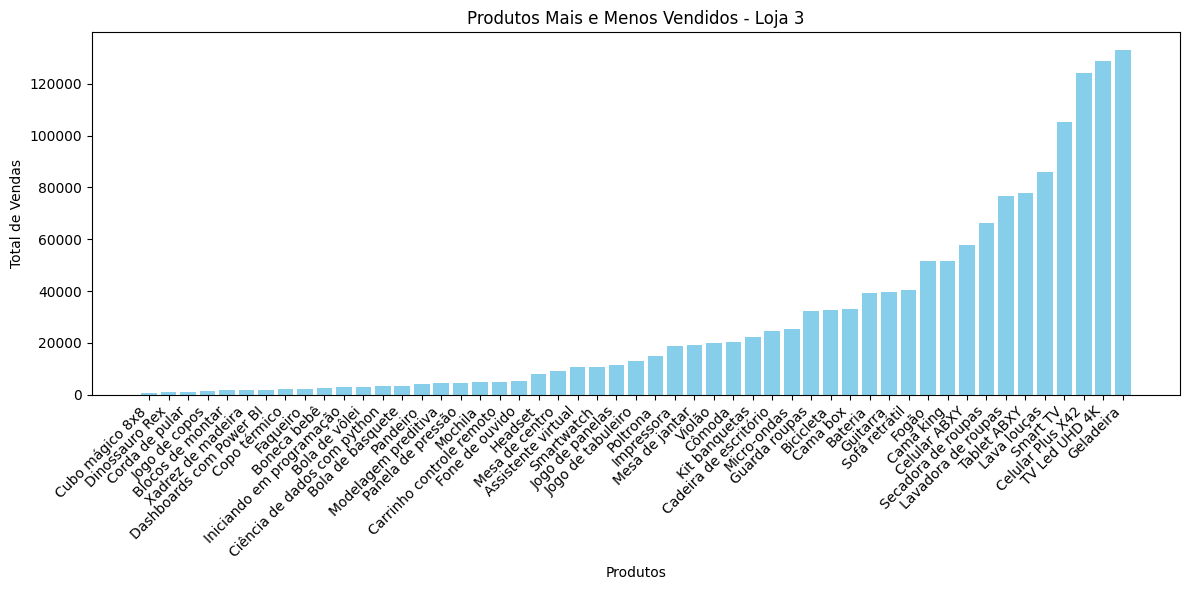

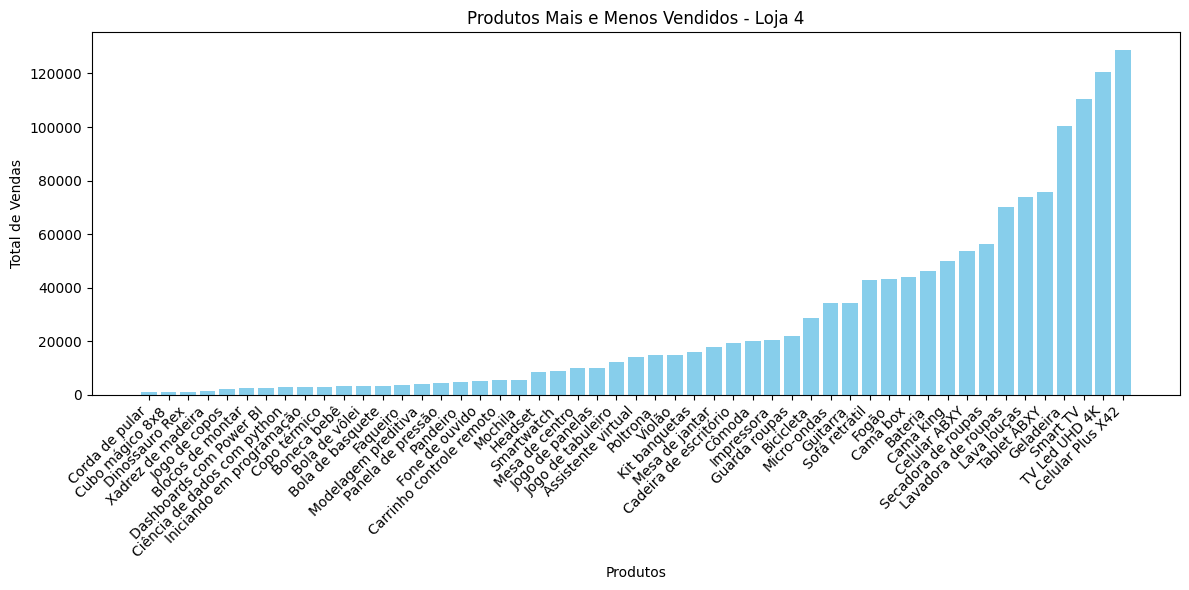

In [75]:
import matplotlib.pyplot as plt

produtos_por_loja = {
    "Loja 1": produtos_vendidos(dados),
    "Loja 2": produtos_vendidos(dados2),
    "Loja 3": produtos_vendidos(dados3),
    "Loja 4": produtos_vendidos(dados4),
}

for loja, produtos in produtos_por_loja.items():
    produtos_ordenados = sorted(produtos.items(), key=lambda x: x[1])
    nomes_produtos = [produto for produto, _ in produtos_ordenados]
    valores_produtos = [valor for _, valor in produtos_ordenados]

    plt.figure(figsize=(12, 6))
    plt.bar(nomes_produtos, valores_produtos, color='skyblue')
    plt.xlabel("Produtos")
    plt.ylabel("Total de Vendas")
    plt.title(f"Produtos Mais e Menos Vendidos - {loja}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# 5. Frete Médio por Loja


In [76]:
def media (lista) :
  valor_frete = 0

  for linha in lista:
    try:
      valor_frete += float(linha[3])
    except (ValueError, IndexError):
        continue

  frete_total = valor_frete / len(lista)
  return frete_total

media_frete = {
  "Loja 1": media(dados),
  "Loja 2": media(dados2),
  "Loja 3": media(dados3),
  "Loja 4": media(dados4),
}
loja_menorFR = min(media_frete, key=media_frete.get)
loja_maiorFR = max(media_frete, key=media_frete.get)

print(f'\033[1;32mA loja que tem a Maior media de frete é a {loja_maiorFR} com {media_frete[loja_maiorFR]:,.2f}')
print(f'\033[31mA loja que tem a Menor media de frete é a {loja_menorFR} com {media_frete[loja_menorFR]:,.2f}')

A loja que tem a Maior media de frete é a Loja 1 com 34.69
A loja que tem a Menor media de frete é a Loja 4 com 31.28


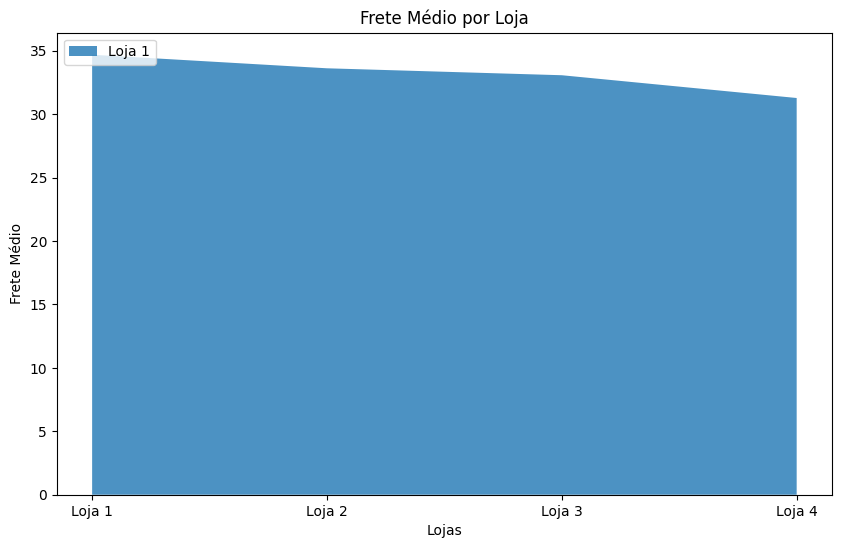

In [77]:
import matplotlib.pyplot as plt

lojas = list(media_frete.keys())
valores_frete = list(media_frete.values())


plt.figure(figsize=(10, 6))
plt.stackplot(lojas, valores_frete, labels=lojas, alpha=0.8)
plt.xlabel("Lojas")
plt.ylabel("Frete Médio")
plt.title("Frete Médio por Loja")
plt.legend(loc='upper left')

plt.show()


# **Relatório**

Diante das avavaliações feitas através dos dados obitidos fica claro a necessidade de se desfazer da loja 4 que tem chances elevadas de trazer prejuízo consideravel para os empresários envolvidos, sendo fortemente recomendado a venda para novos investimentos a fim de recuperar e obter novos recursos e lucros. De acordo com a análize a loja 4 tem boa reputação se comparada as outras porém o lucro não é satisfatório sendo recomendado a reultilização dos métodos aplicados no atendimento desta loja 4 para as demais a fim de almentar a popularidade.